In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.4/750.4 kB 7.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [8]:
!pip install pyboof

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.5/22.5 MB 24.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 50.3 MB/s eta 0:00:00
  Created wheel for pyboof: filename=PyBoof-0.43.1-py3-none-any.whl size=22430767 sha256=1f34f432ef013a3a66af0f1cc6e3f3cf96fa9db0467b01ec3b1ee2c3daca4f06
  Stored in directory: /root/.cache/pip/wheels/aa/f8/b4/fa9a7e88a0720500a97ea5eabbb27d19e51fe2ca4bcc6337b7
Successfully built pyboof


In [3]:
from ultralytics import YOLO
import cv2
import numpy as np
# Load a model
model_1 = YOLO('/content/best.pt')  # pretrained YOLOv8n model
# image path
path = '/content/MicrosoftTeams-image.png'
# Run batched inference on a list of images
results = model_1([path])  # return a list of Results objects

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    #print(result)
    result.show()  # display to screen


0: 640x480 1 QR_CODE, 1 qr_code, 2024.5ms
Speed: 30.6ms preprocess, 2024.5ms inference, 3188.4ms postprocess per image at shape (1, 3, 640, 480)


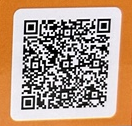

- pyboof result:  https://embassy360.ismartcheck.com/PaymaAHub/crpescalation/crpescQrPage?id=77834681&id2=mnl$mnl&id3=mnl$mnl


In [17]:
import cv2
from google.colab.patches import cv2_imshow
# from pyboof import SimpleImage
import pyboof as pb
from PIL import Image

# Read the image
img = cv2.imread(path)

# Initialize pyboof QR detector
pb_detector = pb.FactoryFiducial(np.uint8).qrcode()

# Initialize variables to track the bounding box with the highest confidence
max_confidence = 0
best_box = None

# Find the bounding box with the highest confidence
for result in results:
    boxes = result.boxes
    for box in boxes:
        # Extract confidence score
        confidence = float(box.conf)

        # Check if the current box has higher confidence than the previous maximum
        if confidence > max_confidence:
            max_confidence = confidence
            best_box = box

# Check if a bounding box with the highest confidence was found
if best_box is not None:
    # Extract bounding box coordinates of the box with the highest confidence
    x_center, y_center, w, h = map(int, best_box.xywh[0].tolist())

    # Padding factor to expand the bounding box
    padding_factor = 0.1  # Adjust padding factor as needed

    # Calculate padding values
    padding_x = int(w * padding_factor)
    padding_y = int(h * padding_factor)

    # Adjust bounding box coordinates with padding
    x1 = max(0, x_center - w // 2 - padding_x)
    y1 = max(0, y_center - h // 2 - padding_y)
    x2 = min(img.shape[1], x_center + w // 2 + padding_x)
    y2 = min(img.shape[0], y_center + h // 2 + padding_y)

    # Crop the padded bounding box region from the original image
    qr_code = img[y1:y2, x1:x2]

    # Display the QR code image
    cv2_imshow(qr_code)

    # Convert frame to grayscale (required by PyBoof)
    gray = cv2.cvtColor(qr_code, cv2.COLOR_BGR2GRAY)
    boof_img = pb.ndarray_to_boof(gray)

    #  # Decode the QR code
    # decoded_qr_code = qr.QrCodeDetector.detect(image=qr_code)

    pb_detector.detect(boof_img)
    if pb_detector.detections:
        for qr in pb_detector.detections:
            print(f"- pyboof result: ", qr.message)
    else:
        print("No information in the QR code detected")
else:
    print("No QR code found.")
